In [1]:
library(data.table)
require(graphics)
library(qcc)
library(readxl)
require(MASS) 
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

Warning message:
"package 'data.table' was built under R version 3.6.3"
Warning message:
"package 'qcc' was built under R version 3.6.3"
Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.

Warning message:
"package 'readxl' was built under R version 3.6.3"
Loading required package: MASS



In [2]:
GAA <- read_excel("ESE 405 HW 5 Data.xlsx")

New names:
* GAA -> GAA...2
* `` -> ...3
* GAA -> GAA...5
* `` -> ...6
* `` -> ...7
* ...



In [3]:
GAAph1=GAA[,2]
GOALTENDERS_IN_PHASE_1=unlist(GAAph1)
GAAph2=GAA[,5]
GOALTENDERS_IN_PHASE_2=unlist(GAAph2)
cat("Statistics for top goaltenders in years 1990-2004:","\n")
summary(GAAph1)
cat("Standard Deviation during those years:","\n")
round(sd(unlist(GAAph1)),digits=4)
cat("Mode during those years:","\n")
Mode1=getmode(GOALTENDERS_IN_PHASE_1)
Mode1
cat("Statistics for top goaltenders in years 2005-2021:","\n")
summary(GAAph2)
cat("Standard Deviation during those years:","\n")
round(sd(unlist(GAAph2)),digits=4)
cat("Mode during those years:","\n")
Mode2=getmode(GOALTENDERS_IN_PHASE_2)
Mode2

Statistics for top goaltenders in years 1990-2004: 


    GAA...2     
 Min.   :1.910  
 1st Qu.:2.315  
 Median :2.485  
 Mean   :2.454  
 3rd Qu.:2.618  
 Max.   :2.730  

Standard Deviation during those years: 


[1] 0.1998

Mode during those years: 


[1] 2.55

Statistics for top goaltenders in years 2005-2021: 


    GAA...5     
 Min.   :2.010  
 1st Qu.:2.430  
 Median :2.490  
 Mean   :2.460  
 3rd Qu.:2.547  
 Max.   :2.600  

Standard Deviation during those years: 


[1] 0.1291

Mode during those years: 


[1] 2.47

It appears that the two means and medians are fairly close, so the initial guess would be that a hypothesis test determining if the goaltenders during the given years performed differently on average would show that the change in goaltending rules produced no significant change. 

Since a t-test can be used on non-random data if the two distributions aren't very skewed, a t-test was attempted with statements $$H_{0}: \mu_{1}=\mu_{2}$$ $$H_{1}: \mu_{1}\neq\mu_{2}\\  $$ 

and with $$\alpha=0.05$$

In [183]:
t.test(unlist(GAAph1),unlist(GAAph2),mu=0,paired=FALSE,var.equal = FALSE,conf.level = .95)


	Welch Two Sample t-test

data:  unlist(GAAph1) and unlist(GAAph2)
t = -0.16647, df = 83.86, p-value = 0.8682
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07249665  0.06129665
sample estimates:
mean of x mean of y 
   2.4540    2.4596 


The two sided test suggests that the guess was right; the p-value was 0.8682 and the change in rules didn't affect the mean heavily. 

However, if we take a closer look at the data, we might see a different picture. Let's test normality, just to be sure.


	Shapiro-Wilk normality test

data:  GOALTENDERS_IN_PHASE_1
W = 0.94929, p-value = 0.0319


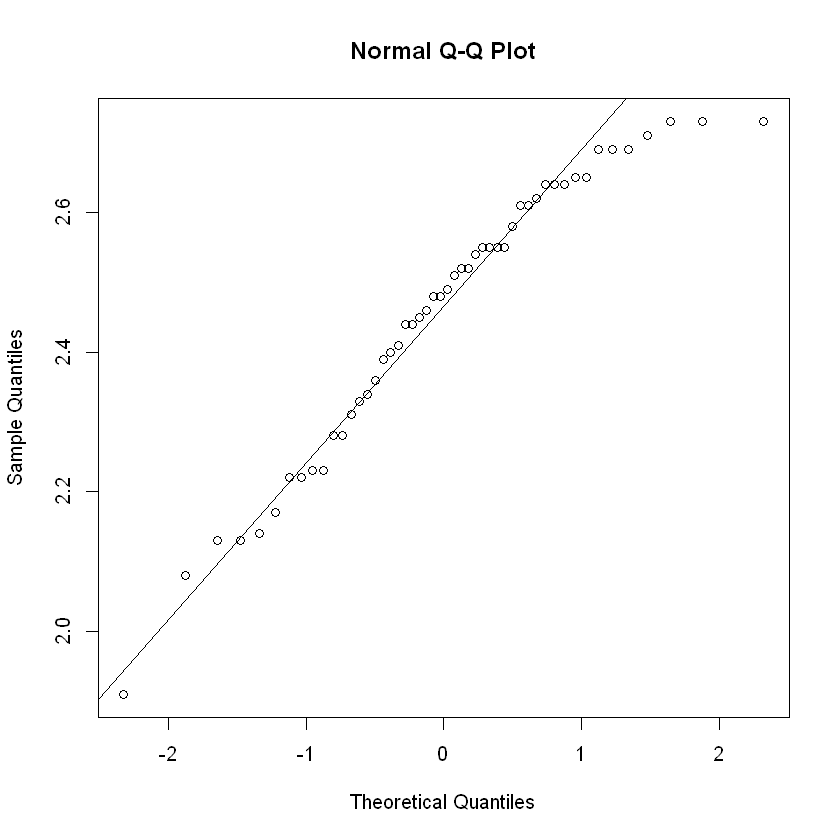

In [213]:
qqnorm(unlist(GAAph1),plot.it=TRUE)
qqline(unlist(GAAph1))
shapiro.test(GOALTENDERS_IN_PHASE_1)


	Shapiro-Wilk normality test

data:  GOALTENDERS_IN_PHASE_2
W = 0.81458, p-value = 1.933e-06


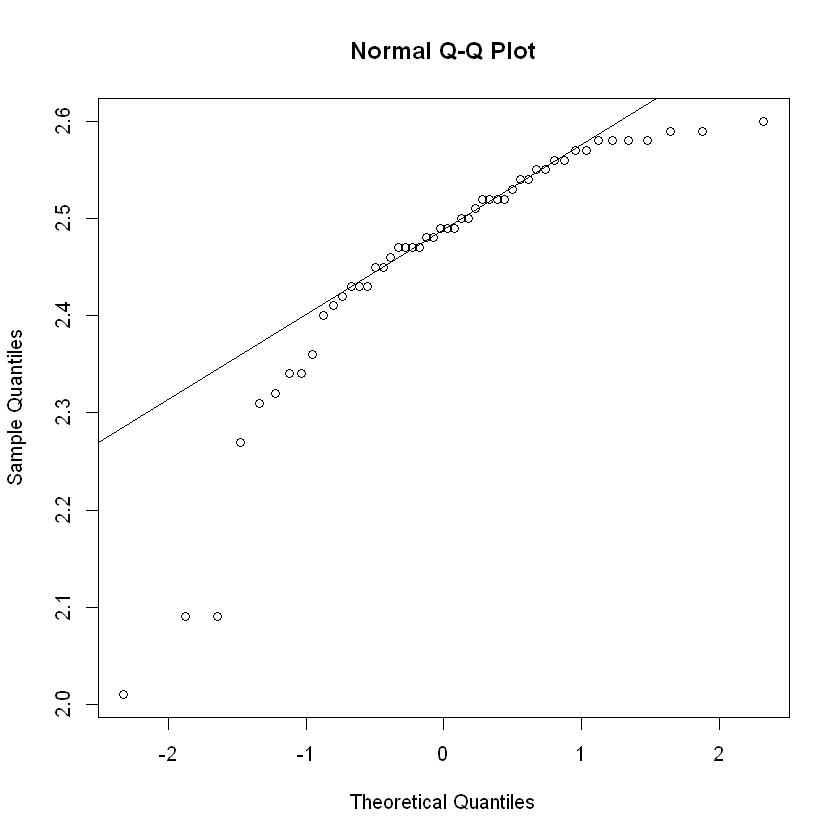

In [212]:
qqnorm(unlist(GAAph2),plot.it=TRUE)
qqline(unlist(GAAph2))
shapiro.test(GOALTENDERS_IN_PHASE_2)

Neither data set is normal! The QQ plot would have the points follow the line closely if it were normal and the Shapiro-Wilk tests would have a p-value greater than 0.05. 

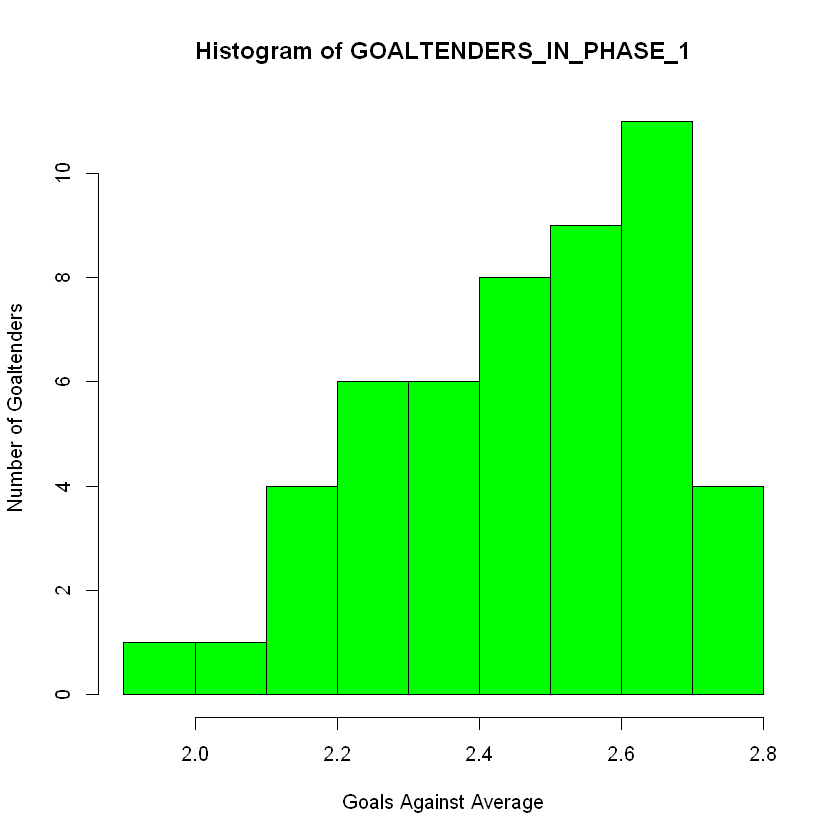

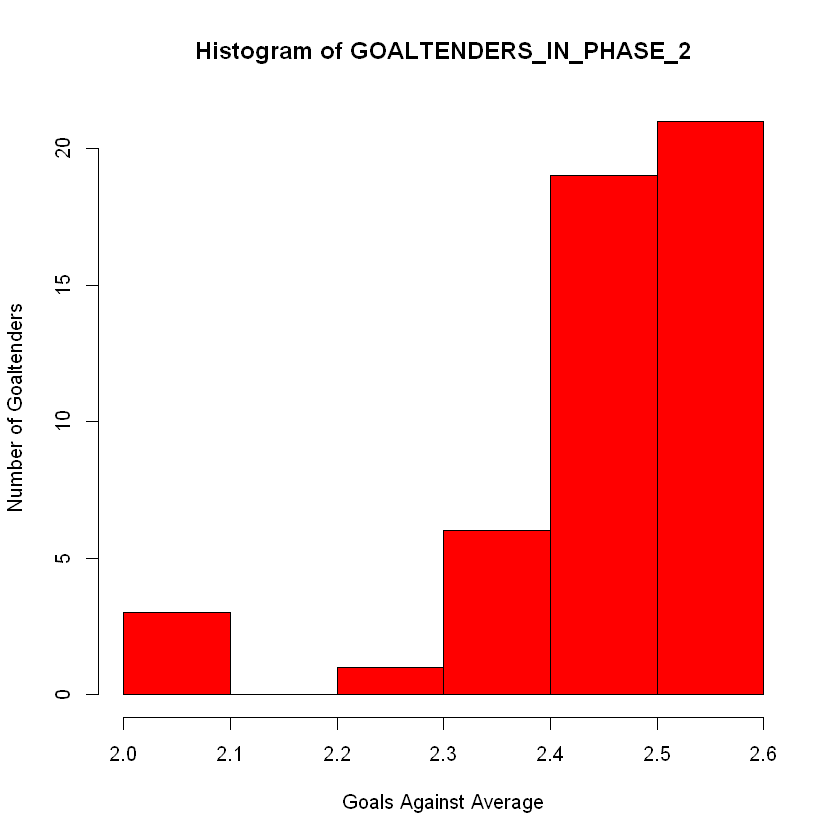

In [211]:
hist(x = GOALTENDERS_IN_PHASE_1,
     ylab = "Number of Goaltenders",
     xlab = "Goals Against Average",
     col = "Green")
hist(x = GOALTENDERS_IN_PHASE_2,
     ylab = "Number of Goaltenders",
     xlab = "Goals Against Average",
     col = "Red")

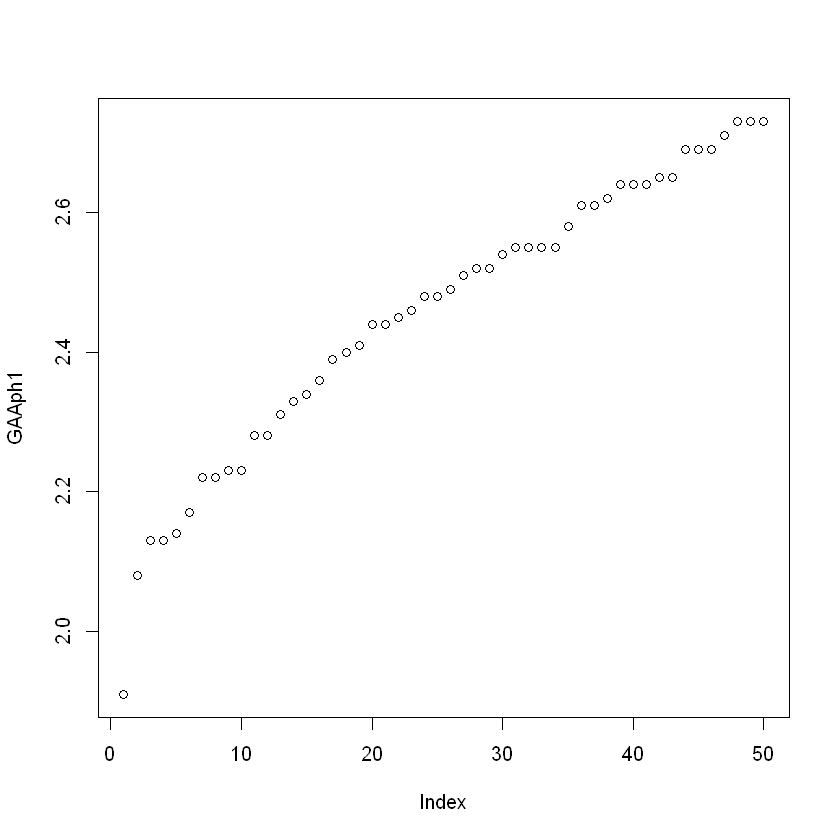

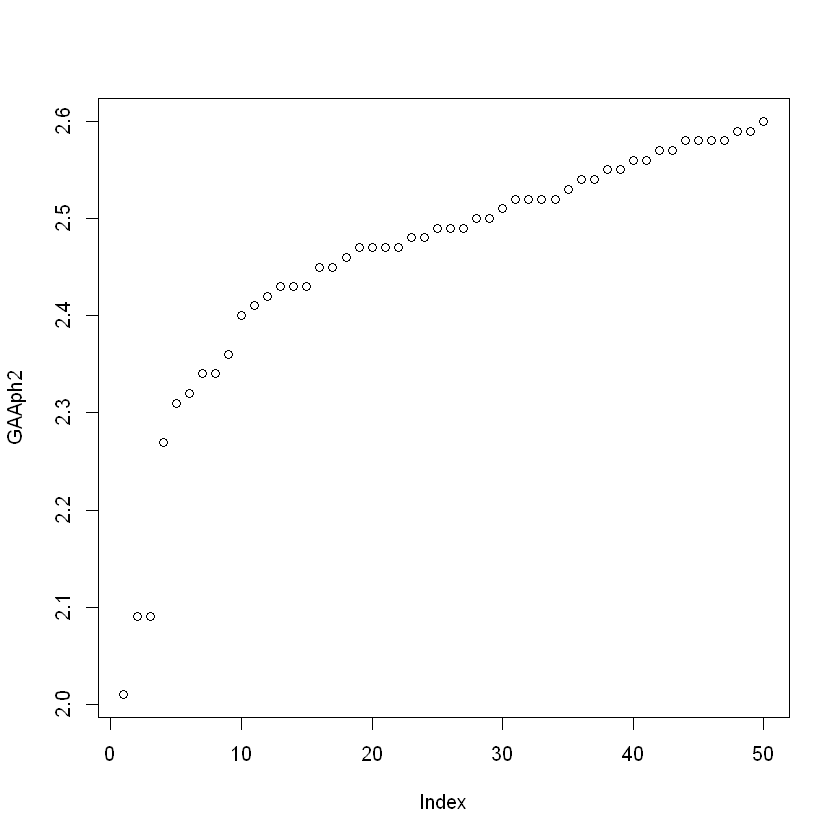

In [4]:
plot.default(GAAph1)
plot.default(GAAph2)